<a href="https://colab.research.google.com/github/ravi-gopalan/DAND_Data_Wrangling/blob/master/scrape_abv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# install chromium, its driver
!apt-get update
!apt install chromium-chromedriver

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:4 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main Sources [1,720 kB]
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main amd64 Package

In [5]:
# install selenium

!pip install selenium

In [0]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

import time
import pandas as pd
import matplotlib.pyplot as plt
import re

In [0]:

# set options to be headless, ..


options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
driver = webdriver.Chrome('chromedriver',options=options)



In [0]:
# Selenium script to scroll to the bottom, wait 3 seconds for the next batch of data to load, then continue scrolling.  
# It will continue to do this until the page stops loading new data.
url = 'https://play.google.com/store/apps/details?id=com.abvmobile&showAllReviews=true'
driver.get(url)
lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight); var lenOfPage=document.body.scrollHeight; return lenOfPage;")
match=False
while(match==False):
  lastCount = lenOfPage
  time.sleep(3)
  lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
  if lastCount==lenOfPage:
    match=True

In [9]:
lenOfPage

24014

In [10]:
driver.current_url

'https://play.google.com/store/apps/details?id=com.abvmobile&showAllReviews=true'

In [11]:
bu = driver.find_elements_by_css_selector('button.LkLjZd.ScJHi.OzU4dc')

len(bu)

17

In [13]:
for item in bu:
  time.sleep(5)
  item.click()
  time.sleep(5)

ElementClickInterceptedException: ignored

In [0]:
driver.current_url

'https://play.google.com/store/apps/details?id=com.abvmobile&showAllReviews=true'

In [14]:
reviewer = []
review_date = []
i = 0

review_info = {}
for item in driver.find_elements_by_css_selector('div.bAhLNe.kx8XBd'):
  reviewer.append(item.text)

helpful_reviews = driver.find_elements_by_css_selector('div.jUL89d.y92BAb')
abridged_review = driver.find_elements(by='xpath',value="//span[@jsname='bN97Pc']")
full_reviews  = driver.find_elements(by='xpath',value="//span[@jsname='fbQN7e']")
stars = driver.find_elements(by='xpath',value="//span[@class='nt2C1d']//div//div[@role='img']")
print(len(reviewer),len(abridged_review), len(full_reviews), len(helpful_reviews),len(stars))

93 93 93 93 93


In [0]:

all_reviews = []
for i, (r, a, f, h, s) in enumerate(zip(reviewer, abridged_review,full_reviews, helpful_reviews, stars )):
  review_info = {}
  review_info.update({'id':i, \
                      'name':r.split('\n')[0], \
                      'review_date':r.split('\n')[1], \
                      'abridged_review': a.text, \
                      'full_review': f.text, \
                      'helpful_review': h.text, \
                      'stars':re.findall(r"\d",s.get_attribute('aria-label'))[0]})
  all_reviews.append(review_info)


In [16]:
df_review = pd.DataFrame(all_reviews)
df_review.info()
df_review['review_date'] = df_review['review_date'].apply(lambda x: pd.datetime.strptime(x, '%B %d, %Y'))
df_review['helpful_review'] = pd.to_numeric(df_review['helpful_review'], errors='coerce')
df_review['stars'] = df_review['stars'].astype('int8') 
df_review.info()
df_review.head()
df_review.drop(columns=['full_review'],inplace=True)
df_review.info()
df_review.head()
df_review.drop(columns=['id'],inplace=True)
df_review.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
id                 93 non-null int64
name               93 non-null object
review_date        93 non-null object
abridged_review    93 non-null object
full_review        93 non-null object
helpful_review     93 non-null object
stars              93 non-null object
dtypes: int64(1), object(6)
memory usage: 5.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
id                 93 non-null int64
name               93 non-null object
review_date        93 non-null datetime64[ns]
abridged_review    93 non-null object
full_review        93 non-null object
helpful_review     62 non-null float64
stars              93 non-null int8
dtypes: datetime64[ns](1), float64(1), int64(1), int8(1), object(3)
memory usage: 4.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
id               

,name,review_date,abridged_review,helpful_review,stars
0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,3.0,4
1,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",1.0,4
2,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,8.0,5
3,eclipse9871,2019-10-16,Love this app especially because it allows use...,6.0,5
4,Jonny Marshall,2019-10-06,Fantastic app. Great resource which is useful ...,NaN,5


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


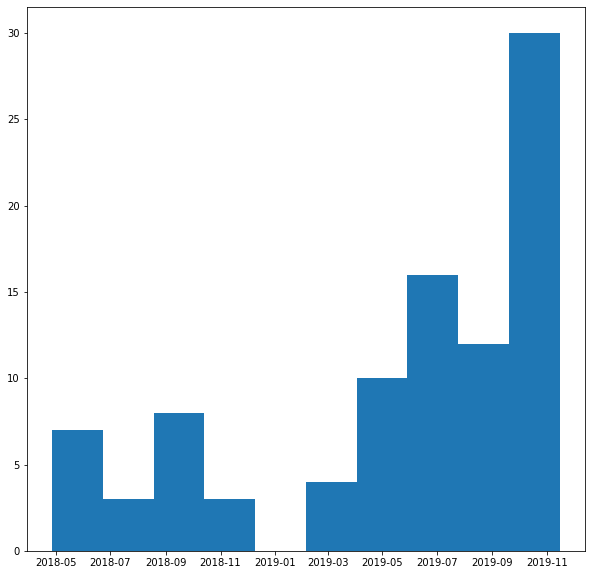

In [17]:
plt.figure(figsize=(10,10))
plt.hist(df_review['review_date'])
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


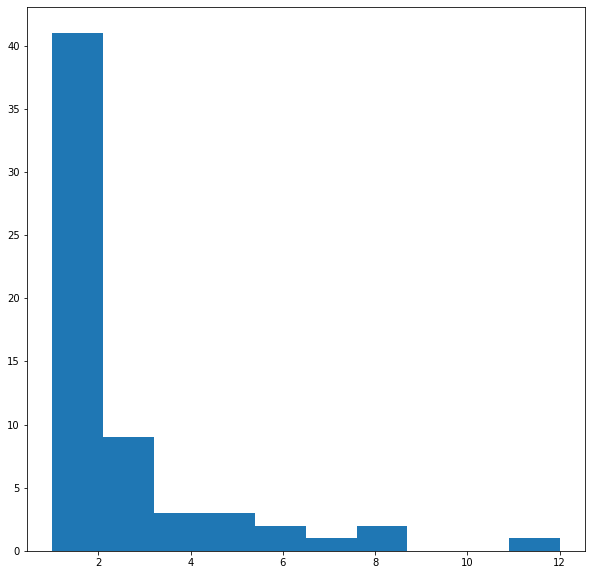

In [18]:
plt.figure(figsize=(10,10))
plt.hist(df_review['helpful_review'])
plt.show()

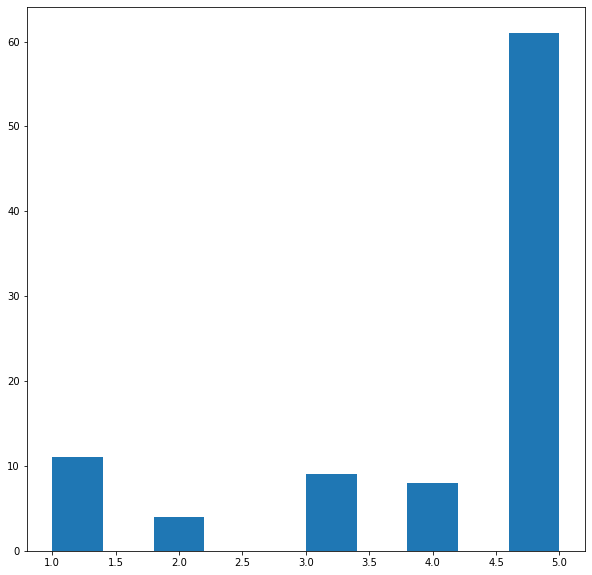

In [19]:
plt.figure(figsize=(10,10))
plt.hist(df_review['stars'])
plt.show()

In [0]:
dates = driver.find_elements(by='xpath',value="//div[@class='LVQB0b']//div[2]//span[@class='p2TkOb']")
person = driver.find_elements(by='xpath',value="//div[@class='LVQB0b']//div[2]//span[@class='X43Kjb']")
all_comms = driver.find_elements(by='xpath',value="//div[@class='LVQB0b']")

In [0]:
dates = driver.find_elements(by='xpath',value="//div[@class='LVQB0b']//div[2]//span[@class='p2TkOb']")
person = driver.find_elements(by='xpath',value="//div[@class='LVQB0b']//div[2]//span[@class='X43Kjb']")
all_comms = driver.find_elements(by='xpath',value="//div[@class='LVQB0b']")


all_responses = []
for i, (d, p, a) in enumerate(zip(dates, person, all_comms)):
  response_info = {}
  response_info.update({'id':i, \
                      'responder_name':p.text, \
                      'response_date':d.text, \
                      'response_text':a.text.split('\n')[1]})
  all_responses.append(response_info)

In [22]:
df_response = pd.DataFrame(all_responses)
df_response['response_date'] = df_response['response_date'].apply(lambda x: pd.datetime.strptime(x, '%B %d, %Y'))
df_response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
id                90 non-null int64
responder_name    90 non-null object
response_date     90 non-null datetime64[ns]
response_text     90 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.9+ KB


In [23]:
df_response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
id                90 non-null int64
responder_name    90 non-null object
response_date     90 non-null datetime64[ns]
response_text     90 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.9+ KB


In [24]:
df_response.head()

,id,responder_name,response_date,response_text
0,0,abillionveg,2019-10-29,"Hi Jared, We apologize for the issue with uplo..."
1,1,abillionveg,2019-10-22,"Dear Ong, Thank you so much for the feedback o..."
2,2,abillionveg,2019-10-22,Wow thank you for this amazing review Shweta!
3,3,abillionveg,2019-10-22,Hello! Thank you so much for the wonderful rev...
4,4,abillionveg,2019-10-22,"Hi Jonny, Thank you so much for posting this n..."


In [26]:
df_review.query('review_date > "2019-10-30"')

,name,review_date,abridged_review,helpful_review,stars
12,caiyun Xu,2019-10-31,"It's a useful app. We can share our reviews, e...",NaN,5
63,Sibel Şendere,2019-11-11,I reviewed 10 vegan products and this app dona...,NaN,5
69,Mohd azman Bin omar,2019-11-15,O.K.,NaN,4


In [28]:
df_review.loc[:11]

,name,review_date,abridged_review,helpful_review,stars
0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,3.0,4
1,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",1.0,4
2,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,8.0,5
3,eclipse9871,2019-10-16,Love this app especially because it allows use...,6.0,5
4,Jonny Marshall,2019-10-06,Fantastic app. Great resource which is useful ...,NaN,5
5,Theresa Salchert,2019-10-16,"I really love this app. Very easy to use, grea...",NaN,5
6,Lee Sheng Chua,2019-09-16,Love how this app binds people of same beliefs...,1.0,5
7,Joy Rose,2019-09-26,A great app with a great mission. I've donated...,1.0,5
8,Hazel Sim,2019-10-16,If you're finding it hard to dine out with fri...,NaN,5
9,Libby Wongstein,2019-10-05,Love the concept of this app. Easy to use and ...,NaN,5


In [29]:
df_review.loc[13:62]

,name,review_date,abridged_review,helpful_review,stars
13,marisa b,2019-10-07,Great app 👍 it's different from Happy Cow beca...,1.0,5
14,Candy Daitch,2019-10-11,Love this app! Very easy to use and very helpf...,NaN,5
15,Marinette Coertzen,2019-10-01,LOVE this app so much! So many good causes to ...,NaN,5
16,Melanie Martina,2019-09-18,Excellent app! I love that I can help raise fu...,NaN,5
17,Crystal H,2019-10-23,Great app that encourages me to eat more vegan...,NaN,5
18,Riante du Toit,2019-09-16,Easy to use. Great for reviewing vegan product...,NaN,5
19,Lobo Lobo,2019-10-01,Unfortunately it does not have a more up to da...,1.0,1
20,Bushra Amin,2019-10-11,"Clicked ""sign up"" and nothing happened. Tried ...",7.0,1
21,Jay Laone,2019-08-20,I like the idea! I think it's a little hard to...,NaN,3
22,Montse GA,2019-09-18,It's super useful for you and you get to help ...,NaN,5


In [31]:
df_review.loc[64:68]

,name,review_date,abridged_review,helpful_review,stars
64,Em Perez,2019-07-27,Downloaded this and theres no vegan or vegetar...,1.0,1
65,Kartik Verma,2019-07-13,I have no idea what the app is about. It's ver...,1.0,1
66,Michał Połaski,2019-05-17,Excellent way to help your chosen sanctuaries!,1.0,4
67,Lin Min Htoo,2019-02-22,Possible Possible today Possible to Possible t...,1.0,5
68,Danielle-Taylor Fleury,2018-11-09,Super cool app#,2.0,5


In [32]:
df_review.loc[70:]

,name,review_date,abridged_review,helpful_review,stars
70,PrX Nation,2019-10-13,Super fun!,NaN,5
71,Paloma Yury,2019-07-15,Es maravillosa la comunidad que se esta constr...,NaN,5
72,Lee Choon Chong,2019-04-20,Hope that this will help me make healthier foo...,3.0,5
73,RJT KMR,2019-05-17,wow,1.0,5
74,Jim Mount,2018-09-06,"A great app, with it's heart in the right plac...",4.0,5
75,A Google user,2018-09-06,This app is a really great tool where vegans c...,4.0,5
76,Rebecca Tay,2018-08-28,I am able to find restaurants near me that off...,3.0,5
77,Sharon Bates,2018-09-10,I love that this app allows reviews of food at...,2.0,5
78,Kai Wong,2018-08-24,I am unable to upload pictures of the dishes (...,3.0,3
79,Tyler Zachocki,2018-09-11,I use a Samsung galaxy s7 and am unable to pos...,1.0,4


In [33]:
pd.concat([df_review.loc[12],df_review.loc[63],df_review.loc[69] ],axis=1).T.reset_index(drop=True)

,name,review_date,abridged_review,helpful_review,stars
0,caiyun Xu,2019-10-31,"It's a useful app. We can share our reviews, e...",NaN,5
1,Sibel Şendere,2019-11-11,I reviewed 10 vegan products and this app dona...,NaN,5
2,Mohd azman Bin omar,2019-11-15,O.K.,NaN,4


In [0]:
df_review_updated = pd.concat([df_review.loc[:11],\
                               df_review.loc[13:62],\
                               df_review.loc[64:68],\
                               df_review.loc[70:],\
                               pd.concat([df_review.loc[12],\
                                          df_review.loc[63],\
                                          df_review.loc[69]],\
                                         axis=1).T.reset_index(drop=True)],\
                              axis=0,\
                              ignore_index=True)

In [35]:
df_review_updated.tail()


,name,review_date,abridged_review,helpful_review,stars
88,Pragnya Roy,2019-05-08,Bill,1,5
89,Rishabh Goyal,2018-05-06,Great app,1,5
90,caiyun Xu,2019-10-31,"It's a useful app. We can share our reviews, e...",NaN,5
91,Sibel Şendere,2019-11-11,I reviewed 10 vegan products and this app dona...,NaN,5
92,Mohd azman Bin omar,2019-11-15,O.K.,NaN,4


In [36]:
df_review_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 5 columns):
name               93 non-null object
review_date        93 non-null datetime64[ns]
abridged_review    93 non-null object
helpful_review     62 non-null object
stars              93 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 3.8+ KB


In [0]:
df_review_updated['helpful_review'] = pd.to_numeric(df_review_updated['helpful_review'], errors='coerce')
df_review_updated['stars'] = df_review_updated['stars'].astype('int8') 

In [0]:
df_review_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
name               92 non-null object
review_date        92 non-null datetime64[ns]
abridged_review    92 non-null object
helpful_review     62 non-null float64
stars              92 non-null int8
dtypes: datetime64[ns](1), float64(1), int8(1), object(2)
memory usage: 3.1+ KB


In [38]:
df_review_updated.head()

,name,review_date,abridged_review,helpful_review,stars
0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,3.0,4
1,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",1.0,4
2,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,8.0,5
3,eclipse9871,2019-10-16,Love this app especially because it allows use...,6.0,5
4,Jonny Marshall,2019-10-06,Fantastic app. Great resource which is useful ...,NaN,5


In [0]:
df_full = pd.concat([df_review_updated, df_response],axis=1)

In [40]:
df_full.head()

,name,review_date,abridged_review,helpful_review,stars,id,responder_name,response_date,response_text
0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,3.0,4,0.0,abillionveg,2019-10-29,"Hi Jared, We apologize for the issue with uplo..."
1,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",1.0,4,1.0,abillionveg,2019-10-22,"Dear Ong, Thank you so much for the feedback o..."
2,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,8.0,5,2.0,abillionveg,2019-10-22,Wow thank you for this amazing review Shweta!
3,eclipse9871,2019-10-16,Love this app especially because it allows use...,6.0,5,3.0,abillionveg,2019-10-22,Hello! Thank you so much for the wonderful rev...
4,Jonny Marshall,2019-10-06,Fantastic app. Great resource which is useful ...,NaN,5,4.0,abillionveg,2019-10-22,"Hi Jonny, Thank you so much for posting this n..."


In [41]:
df_full.tail()

,name,review_date,abridged_review,helpful_review,stars,id,responder_name,response_date,response_text
88,Pragnya Roy,2019-05-08,Bill,1.0,5,88.0,abillionveg,2019-05-13,"Thank you Pragnya, grateful to have you on boa..."
89,Rishabh Goyal,2018-05-06,Great app,1.0,5,89.0,abillionveg,2018-07-25,"Thanks very much Rishabh, we just crossed 5,00..."
90,caiyun Xu,2019-10-31,"It's a useful app. We can share our reviews, e...",NaN,5,NaN,NaN,NaT,NaN
91,Sibel Şendere,2019-11-11,I reviewed 10 vegan products and this app dona...,NaN,5,NaN,NaN,NaT,NaN
92,Mohd azman Bin omar,2019-11-15,O.K.,NaN,4,NaN,NaN,NaT,NaN


In [0]:
df_full.to_csv('full_review_details.csv')


In [43]:
import nltk
import string
nltk.download(['stopwords','punkt','wordnet','averaged_perceptron_tagger','vader_lexicon'])
from nltk import word_tokenize, sent_tokenize, pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # lower text
    try:
      text = str(text).lower()
    except:
      text = ''.join(re.findall(r"\D",str(text))).lower()


    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    #text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [0]:
df_full['clean_reviews'] = df_full['abridged_review'].apply(lambda x: clean_text(x))
df_full['clean_response'] = df_full['response_text'].apply(lambda x: clean_text(x))

In [49]:
df_full.head()

,name,review_date,abridged_review,helpful_review,stars,id,responder_name,response_date,response_text,clean_reviews,clean_response
0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,3.0,4,0.0,abillionveg,2019-10-29,"Hi Jared, We apologize for the issue with uplo...",loving concept app even without donations stil...,hi jared apologize issue uploading photos due ...
1,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",1.0,4,1.0,abillionveg,2019-10-22,"Dear Ong, Thank you so much for the feedback o...",overall considered bad good app help vegan veg...,dear ong thank much feedback accessing folders...
2,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,8.0,5,2.0,abillionveg,2019-10-22,Wow thank you for this amazing review Shweta!,using app now.apart looking reviews restaurant...,wow thank amazing review shweta
3,eclipse9871,2019-10-16,Love this app especially because it allows use...,6.0,5,3.0,abillionveg,2019-10-22,Hello! Thank you so much for the wonderful rev...,love app especially allows users make donation...,hello thank much wonderful review app many new...
4,Jonny Marshall,2019-10-06,Fantastic app. Great resource which is useful ...,NaN,5,4.0,abillionveg,2019-10-22,"Hi Jonny, Thank you so much for posting this n...",fantastic app great resource useful find vegan...,hi jonny thank much posting nice review app ge...


In [50]:
df_full.tail()

,name,review_date,abridged_review,helpful_review,stars,id,responder_name,response_date,response_text,clean_reviews,clean_response
88,Pragnya Roy,2019-05-08,Bill,1.0,5,88.0,abillionveg,2019-05-13,"Thank you Pragnya, grateful to have you on boa...",bill,thank pragnya grateful board working build com...
89,Rishabh Goyal,2018-05-06,Great app,1.0,5,89.0,abillionveg,2018-07-25,"Thanks very much Rishabh, we just crossed 5,00...",great app,thanks much rishabh crossed reviews countries ...
90,caiyun Xu,2019-10-31,"It's a useful app. We can share our reviews, e...",NaN,5,NaN,NaN,NaT,NaN,useful app share reviews exchange useful infor...,nan
91,Sibel Şendere,2019-11-11,I reviewed 10 vegan products and this app dona...,NaN,5,NaN,NaN,NaT,NaN,reviewed vegan products app donated one animal...,nan
92,Mohd azman Bin omar,2019-11-15,O.K.,NaN,4,NaN,NaN,NaT,NaN,o.k,nan


In [0]:


df_full.head(20)

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,name,review_date,abridged_review,helpful_review,stars,id,responder_name,response_date,response_text,clean_reviews,clean_response
0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,2.0,4,0.0,abillionveg,2019-10-29,"Hi Jared, We apologize for the issue with uplo...",love concept app even without donation still g...,hi jar apologize issue upload photo due server...
1,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",1.0,4,1.0,abillionveg,2019-10-22,"Dear Ong, Thank you so much for the feedback o...",overall consider bad good app help vegan veget...,dear ong thank much feedback access folder gal...
2,eclipse9871,2019-10-16,Love this app especially because it allows use...,4.0,5,2.0,abillionveg,2019-10-22,Hello! Thank you so much for the wonderful rev...,love app especially allow user make donation a...,hello thank much wonderful review app many new...
3,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,8.0,5,3.0,abillionveg,2019-10-22,Wow thank you for this amazing review Shweta!,use app now.apart look reviews restaurant dish...,wow thank amaze review shweta
4,Jay Laone,2019-08-20,I like the idea! I think it's a little hard to...,NaN,3,4.0,abillionveg,2019-08-21,"Hey Jay, Thanks so much for the review. We hav...",like idea think little hard use find restauran...,hey jay thanks much review long way go excited...
5,Theresa Salchert,2019-10-16,"I really love this app. Very easy to use, grea...",NaN,5,5.0,abillionveg,2019-10-22,"Hi Theresa, Thank you so much for the wonderfu...",really love app easy use great see item purcha...,hi theresa thank much wonderful review app man...
6,Jonny Marshall,2019-10-06,Fantastic app. Great resource which is useful ...,NaN,5,6.0,abillionveg,2019-10-22,"Hi Jonny, Thank you so much for posting this n...",fantastic app great resource useful find vegan...,hi jonny thank much posting nice review app ge...
7,Hazel Sim,2019-10-16,If you're finding it hard to dine out with fri...,NaN,5,7.0,abillionveg,2019-10-22,Thanks for the great review Hazel!,find hard dine friend may vegan feel impossibl...,thanks great review hazel
8,Lee Sheng Chua,2019-09-16,Love how this app binds people of same beliefs...,1.0,5,8.0,abillionveg,2019-09-17,"Hi Lee Sheng, thank you so much for taking the...",love app bind people belief also platform anyo...,hi lee sheng thank much take time post review ...
9,Joy Rose,2019-09-26,A great app with a great mission. I've donated...,1.0,5,9.0,abillionveg,2019-10-22,"Dear Joy, It's only because of your contributi...",great app great mission i've donate animal san...,dear joy contribution build community chance m...


In [51]:
# add sentiment anaylsis columns
sid = SentimentIntensityAnalyzer()

df_sentiments = pd.DataFrame(list(df_full['abridged_review'].apply(lambda x: sid.polarity_scores(x))))
df_sentiments.columns=['review_neg','review_neu','review_pos','review_compond']
df_sentiments.head()

,review_neg,review_neu,review_pos,review_compond
0,0.035,0.722,0.244,0.9237
1,0.044,0.729,0.227,0.8845
2,0.000,0.843,0.157,0.8442
3,0.000,0.919,0.081,0.6696
4,0.000,0.632,0.368,0.9657


In [52]:
df_full = pd.concat([df_full, df_sentiments],axis=1)
df_full.head()

,name,review_date,abridged_review,helpful_review,stars,id,responder_name,response_date,response_text,clean_reviews,clean_response,review_neg,review_neu,review_pos,review_compond
0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,3.0,4,0.0,abillionveg,2019-10-29,"Hi Jared, We apologize for the issue with uplo...",loving concept app even without donations stil...,hi jared apologize issue uploading photos due ...,0.035,0.722,0.244,0.9237
1,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",1.0,4,1.0,abillionveg,2019-10-22,"Dear Ong, Thank you so much for the feedback o...",overall considered bad good app help vegan veg...,dear ong thank much feedback accessing folders...,0.044,0.729,0.227,0.8845
2,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,8.0,5,2.0,abillionveg,2019-10-22,Wow thank you for this amazing review Shweta!,using app now.apart looking reviews restaurant...,wow thank amazing review shweta,0.000,0.843,0.157,0.8442
3,eclipse9871,2019-10-16,Love this app especially because it allows use...,6.0,5,3.0,abillionveg,2019-10-22,Hello! Thank you so much for the wonderful rev...,love app especially allows users make donation...,hello thank much wonderful review app many new...,0.000,0.919,0.081,0.6696
4,Jonny Marshall,2019-10-06,Fantastic app. Great resource which is useful ...,NaN,5,4.0,abillionveg,2019-10-22,"Hi Jonny, Thank you so much for posting this n...",fantastic app great resource useful find vegan...,hi jonny thank much posting nice review app ge...,0.000,0.632,0.368,0.9657


In [53]:
df_full.review_compond.mean()
df_full.stars.mean()

4.118279569892473

In [55]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5)
tfidf_result = tfidf.fit_transform(df_full['clean_reviews']).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df_full.index
tfidf_df.head()

,word_also,word_animal,word_animals,word_app,word_area,word_can,word_concept,word_dishes,word_donations,word_easy,word_find,word_food,word_full,word_get,word_good,word_great,word_help,word_helpful,word_idea,word_know,word_like,word_love,word_make,word_many,word_much,word_near,word_new,word_one,word_options,word_people,word_products,word_restaurants,word_review,word_reviews,word_sanctuaries,word_search,word_see,word_think,word_use,word_vegan,word_way,word_world,word_would
0,0.000000,0.000000,0.000000,0.171039,0.0,0.458276,0.423134,0.000000,0.458276,0.0,0.0000,0.000000,0.311203,0.00000,0.000000,0.242842,0.000000,0.0,0.363826,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.288931,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.231074,0.000000,0.000000,0.114114,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.196237,0.207627,0.00000,0.282306,0.000000,0.256351,0.0,0.000000,0.0,0.305752,0.000000,0.272706,0.0,0.0,0.0,0.000000,0.0,0.272706,0.00000,0.000000,0.000000,0.578304,0.000000,0.000000,0.0,0.0,0.0,0.0,0.360410,0.0,0.000000,0.0
2,0.260087,0.000000,0.330001,0.385325,0.0,0.000000,0.000000,0.344142,0.000000,0.0,0.0000,0.000000,0.233697,0.00000,0.317752,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.330001,0.0,0.000000,0.00000,0.273214,0.254167,0.216972,0.254167,0.000000,0.0,0.0,0.0,0.0,0.202831,0.0,0.000000,0.0
3,0.239696,0.531834,0.000000,0.236743,0.0,0.000000,0.000000,0.000000,0.317161,0.0,0.0000,0.000000,0.215375,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.190004,0.282882,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.399922,0.000000,0.282882,0.0,0.0,0.0,0.0,0.000000,0.0,0.317161,0.0
4,0.509500,0.000000,0.000000,0.125806,0.0,0.000000,0.000000,0.000000,0.337080,0.0,0.2748,0.216344,0.000000,0.33708,0.000000,0.178619,0.000000,0.0,0.267608,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.33708,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.397338,0.0,0.000000,0.0


In [56]:
tfidf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 43 columns):
word_also           93 non-null float64
word_animal         93 non-null float64
word_animals        93 non-null float64
word_app            93 non-null float64
word_area           93 non-null float64
word_can            93 non-null float64
word_concept        93 non-null float64
word_dishes         93 non-null float64
word_donations      93 non-null float64
word_easy           93 non-null float64
word_find           93 non-null float64
word_food           93 non-null float64
word_full           93 non-null float64
word_get            93 non-null float64
word_good           93 non-null float64
word_great          93 non-null float64
word_help           93 non-null float64
word_helpful        93 non-null float64
word_idea           93 non-null float64
word_know           93 non-null float64
word_like           93 non-null float64
word_love           93 non-null float64
word_make        

In [57]:
df_full = pd.concat([df_full, tfidf_df], axis=1)
df_full.head(10)

,name,review_date,abridged_review,helpful_review,stars,id,responder_name,response_date,response_text,clean_reviews,clean_response,review_neg,review_neu,review_pos,review_compond,word_also,word_animal,word_animals,word_app,word_area,word_can,word_concept,word_dishes,word_donations,word_easy,word_find,word_food,word_full,word_get,word_good,word_great,word_help,word_helpful,word_idea,word_know,word_like,word_love,word_make,word_many,word_much,word_near,word_new,word_one,word_options,word_people,word_products,word_restaurants,word_review,word_reviews,word_sanctuaries,word_search,word_see,word_think,word_use,word_vegan,word_way,word_world,word_would
0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,3.0,4,0.0,abillionveg,2019-10-29,"Hi Jared, We apologize for the issue with uplo...",loving concept app even without donations stil...,hi jared apologize issue uploading photos due ...,0.035,0.722,0.244,0.9237,0.000000,0.000000,0.000000,0.171039,0.0,0.458276,0.423134,0.000000,0.458276,0.000000,0.0000,0.000000,0.311203,0.00000,0.000000,0.242842,0.000000,0.0,0.363826,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288931,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",1.0,4,1.0,abillionveg,2019-10-22,"Dear Ong, Thank you so much for the feedback o...",overall considered bad good app help vegan veg...,dear ong thank much feedback accessing folders...,0.044,0.729,0.227,0.8845,0.231074,0.000000,0.000000,0.114114,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.196237,0.207627,0.00000,0.282306,0.000000,0.256351,0.0,0.000000,0.0,0.305752,0.000000,0.272706,0.00000,0.0,0.0,0.000000,0.000000,0.272706,0.000000,0.000000,0.000000,0.578304,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.360410,0.000000,0.000000,0.0
2,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,8.0,5,2.0,abillionveg,2019-10-22,Wow thank you for this amazing review Shweta!,using app now.apart looking reviews restaurant...,wow thank amazing review shweta,0.000,0.843,0.157,0.8442,0.260087,0.000000,0.330001,0.385325,0.0,0.000000,0.000000,0.344142,0.000000,0.000000,0.0000,0.000000,0.233697,0.00000,0.317752,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.330001,0.000000,0.000000,0.000000,0.273214,0.254167,0.216972,0.254167,0.000000,0.0,0.000000,0.0,0.000000,0.202831,0.000000,0.000000,0.0
3,eclipse9871,2019-10-16,Love this app especially because it allows use...,6.0,5,3.0,abillionveg,2019-10-22,Hello! Thank you so much for the wonderful rev...,love app especially allows users make donation...,hello thank much wonderful review app many new...,0.000,0.919,0.081,0.6696,0.239696,0.531834,0.000000,0.236743,0.0,0.000000,0.000000,0.000000,0.317161,0.000000,0.0000,0.000000,0.215375,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.190004,0.282882,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.399922,0.000000,0.282882,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.317161,0.0
4,Jonny Marshall,2019-10-06,Fantastic app. Great resource which is useful ...,NaN,5,4.0,abillionveg,2019-10-22,"Hi Jonny, Thank you so much for posting this n...",fantastic app great resource useful find vegan...,hi jonny thank much posting nice review app ge...,0.000,0.632,0.368,0.9657,0.509500,0.000000,0.000000,0.125806,0.0,0.000000,0.000000,0.000000,0.337080,0.000000,0.2748,0.216344,0.000000,0.33708,0.000000,0.178619,0.000000,0.0,0.267608,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.337080,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.397338,0.000000,0.000000,0.0
5,Theresa Salchert,2019-10-16,"I really love this app. Very easy to use, grea...",NaN,5,5.0,abillionveg,2019-10-22,"Hi Theresa, Thank you so much for the wonderfu...",really love app easy use great see items purch...,hi the

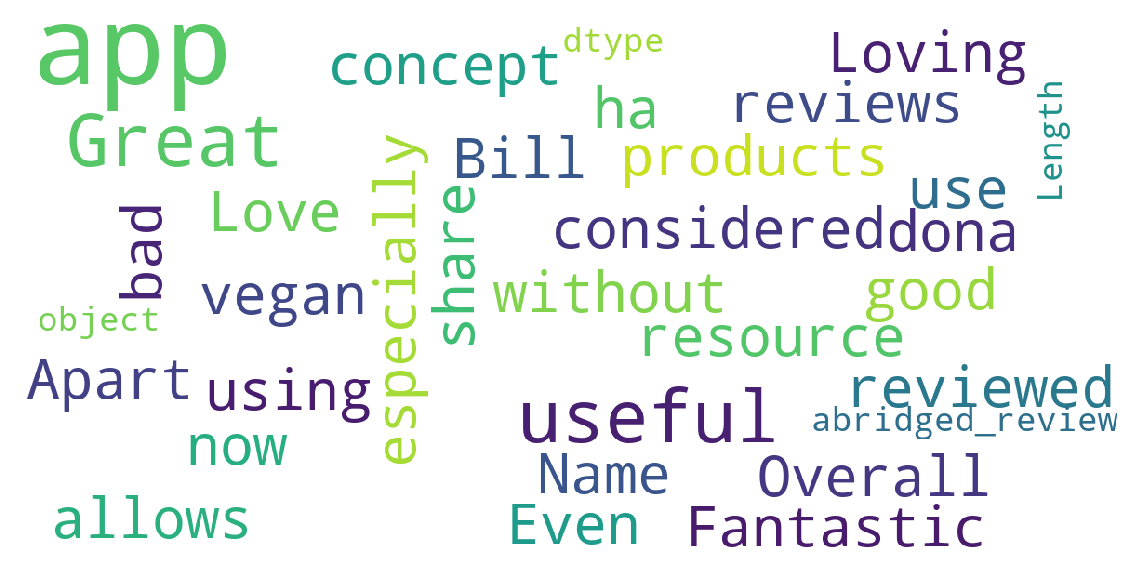

In [58]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df_full['abridged_review'])

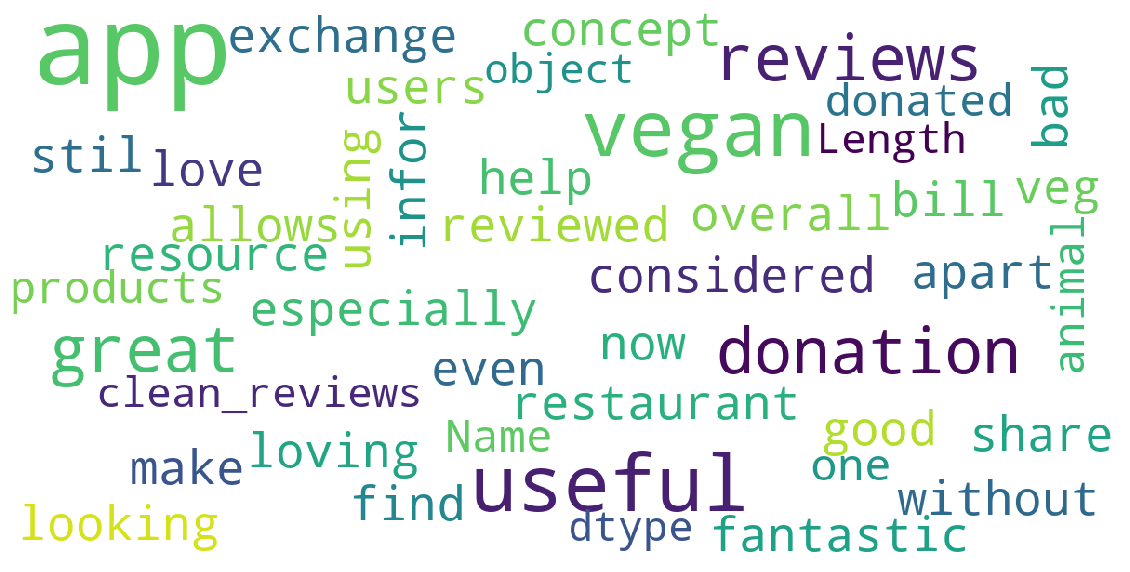

In [59]:
show_wordcloud(df_full['clean_reviews'])

In [65]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 58 columns):
name                93 non-null object
review_date         93 non-null datetime64[ns]
abridged_review     93 non-null object
helpful_review      62 non-null float64
stars               93 non-null int8
id                  90 non-null float64
responder_name      90 non-null object
response_date       90 non-null datetime64[ns]
response_text       90 non-null object
clean_reviews       93 non-null object
clean_response      93 non-null object
review_neg          93 non-null float64
review_neu          93 non-null float64
review_pos          93 non-null float64
review_compond      93 non-null float64
word_also           93 non-null float64
word_animal         93 non-null float64
word_animals        93 non-null float64
word_app            93 non-null float64
word_area           93 non-null float64
word_can            93 non-null float64
word_concept        93 non-null float64
word_dishes 

In [0]:
df_full['day'] = df_full['review_date'].dt.day
df_full['week'] = df_full['review_date'].dt.week
df_full['month'] = df_full['review_date'].dt.month
df_full['hour'] = df_full['review_date'].dt.hour
df_full['year'] = df_full['review_date'].dt.year

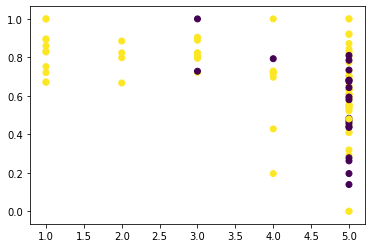

In [100]:
plt.scatter(df_full['stars'],df_full['review_neu'],c=df_full['year'])

In [70]:
df_full[['name','stars','review_compond','year','month']].sort_values(['review_compond'],ascending=False)

,name,stars,review_compond,year,month
4,Jonny Marshall,5,0.9657,2019,10
49,Rachael Soh,5,0.9632,2019,5
73,Rebecca Tay,5,0.9612,2018,8
6,Lee Sheng Chua,5,0.9611,2019,9
7,Joy Rose,5,0.9595,2019,9
...,...,...,...,...,...
36,dana ciobanu,2,-0.6705,2019,6
28,Renèe Allpress,3,-0.6950,2019,8
48,geoff stamp,1,-0.7832,2019,9
56,miranda hart,1,-0.7845,2019,6


In [85]:
import numpy as np
import seaborn as sns


,year,month,stars,review_compond
0,2018,4,5.000000,0.759850
1,2018,5,5.000000,0.695260
2,2018,6,3.000000,0.844200
3,2018,7,5.000000,0.619650
4,2018,8,4.000000,0.480600
5,2018,9,4.833333,0.819783
6,2018,10,5.000000,0.935800
7,2018,11,5.000000,0.826650
8,2019,2,5.000000,0.555350
9,2019,3,4.000000,0.720450


In [88]:
star_analysis = df_full[['name','stars','review_compond','year','month']].groupby(by=['year','month'], as_index=False)['stars','review_compond'].agg(np.mean)

star_analysis.head()

,year,month,stars,review_compond
0,2018,4,5.0,0.75985
1,2018,5,5.0,0.69526
2,2018,6,3.0,0.84420
3,2018,7,5.0,0.61965
4,2018,8,4.0,0.48060


In [90]:
star_analysis = star_analysis.assign(date=pd.to_datetime(star_analysis[['year', 'month']].assign(day=1)))

star_analysis.head()

,year,month,stars,review_compond,date
0,2018,4,5.0,0.75985,2018-04-01
1,2018,5,5.0,0.69526,2018-05-01
2,2018,6,3.0,0.84420,2018-06-01
3,2018,7,5.0,0.61965,2018-07-01
4,2018,8,4.0,0.48060,2018-08-01


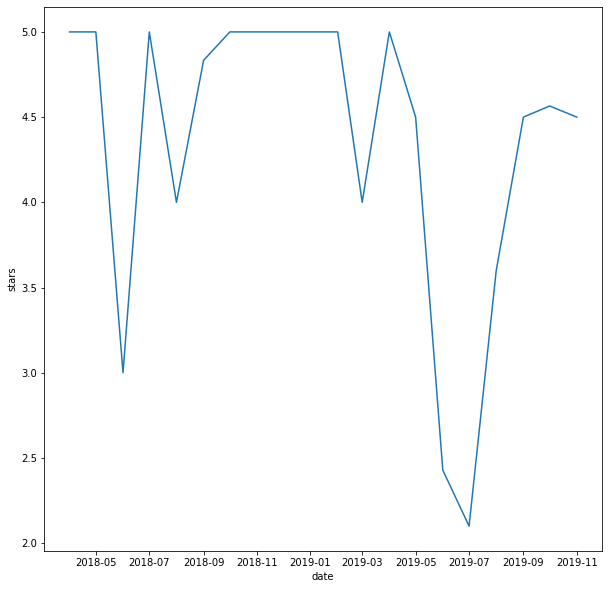

In [94]:
plt.figure(figsize=(10,10))
sns.lineplot(data=star_analysis,x = 'date', y = 'stars')

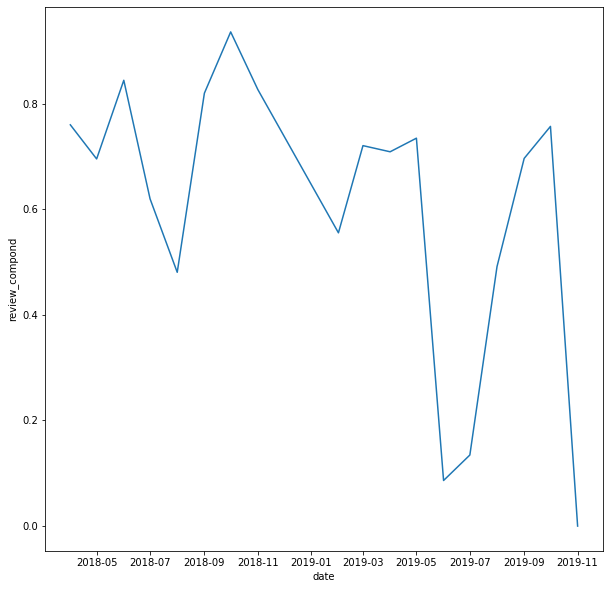

In [95]:
plt.figure(figsize=(10,10))
sns.lineplot(data=star_analysis,x = 'date', y = 'review_compond')

In [96]:
df_full.query('year==2019 & month==11')

,name,review_date,abridged_review,helpful_review,stars,id,responder_name,response_date,response_text,clean_reviews,clean_response,review_neg,review_neu,review_pos,review_compond,word_also,word_animal,word_animals,word_app,word_area,word_can,word_concept,word_dishes,word_donations,word_easy,word_find,word_food,word_full,word_get,word_good,word_great,word_help,word_helpful,word_idea,word_know,word_like,word_love,word_make,word_many,word_much,word_near,word_new,word_one,word_options,word_people,word_products,word_restaurants,word_review,word_reviews,word_sanctuaries,word_search,word_see,word_think,word_use,word_vegan,word_way,word_world,word_would,day,week,month,hour,year
91,Sibel Şendere,2019-11-11,I reviewed 10 vegan products and this app dona...,NaN,5,NaN,NaN,NaT,NaN,reviewed vegan products app donated one animal...,nan,0.0,1.0,0.0,0.0,0.0,0.453972,0.0,0.202083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.482934,0.0,0.0,0.429861,0.0,0.0,0.0,0.482934,0.0,0.0,0.0,0.0,0.319124,0.0,0.0,0.0,11,46,11,0,2019
92,Mohd azman Bin omar,2019-11-15,O.K.,NaN,4,NaN,NaN,NaT,NaN,o.k,nan,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,15,46,11,0,2019


In [103]:
df_full.query('year==2019 & month==11')[['name','abridged_review','stars','review_compond']]

,name,abridged_review,stars,review_compond
91,Sibel Şendere,I reviewed 10 vegan products and this app dona...,5,0.0
92,Mohd azman Bin omar,O.K.,4,0.0


In [107]:
df_full.query('year==2019 & (month==6 | month==7)')\
[['month','name','abridged_review','clean_reviews','stars','review_compond']]\
.sort_values(by=['month','stars'],ascending=[True, False])

,month,name,abridged_review,clean_reviews,stars,review_compond
38,6,A Google user,"Great app, very helpful for eating out.",great app helpful eating,5,0.8016
22,6,Chase S,vegan on pixel 3 the search mechanic is clunky...,vegan pixel search mechanic clunky right hit s...,3,-0.0516
26,6,verbosity9,Has a long way to go. These apps seem to be al...,long way go apps seem rage lately yet see one ...,3,0.7579
36,6,dana ciobanu,unfortunately I can't login my account from th...,unfortunately can't login account app website ...,2,-0.6705
43,6,Monique Martinez,i love the concept and i tried to use it. i no...,love concept tried use notiiced option town tr...,2,0.2263
34,6,Lani Conlay,can't open this app its keeps crashing and whe...,can't open app keeps crashing crash freezes si...,1,0.3252
56,6,miranda hart,no vegan options listed in my city when we hav...,vegan options listed city vegan restaurants po...,1,-0.7845
31,7,Grace Coates,Loving this much-needed app! So great for new ...,loving much-needed app great new vegans help f...,5,0.9321
68,7,Paloma Yury,Es maravillosa la comunidad que se esta constr...,es maravillosa la comunidad que se esta constr...,5,0.6239
23,7,Geoff Levner,"Great idea, but the app has some big problems....",great idea app big problems often blocks compl...,3,-0.7845
